In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import os
import glob
import numpy as np
from keras.preprocessing import image

In [2]:
def load_images(main_directory):
    all_images = []
    labels = []

    # Loop through each subdirectory in the main directory
    for subdir in os.listdir(main_directory):
        full_subdir_path = os.path.join(main_directory, subdir)

        # Check if it's a directory (not a file or other type)
        if os.path.isdir(full_subdir_path):

            # Loop through each file in the subdirectory
            for file in glob.glob(os.path.join(full_subdir_path, '*.*')):
                img = image.load_img(file, target_size=(224, 224))
                img_array = image.img_to_array(img)
                all_images.append(img_array)
                labels.append(subdir)  # using the subdirectory name as label
    
    np_images = np.array(all_images).astype('float32')  # Convert to numpy array
    # np_images /= 255.0 # Normalize images

    return np_images, labels

In [3]:
# Alternative approach
"""
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)
                                                            """

"\n_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'\npath_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)\nPATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')\n\ntrain_dir = os.path.join(PATH, 'train')\nvalidation_dir = os.path.join(PATH, 'validation')\n\nBATCH_SIZE = 32\nIMG_SIZE = (160, 160)\n\ntrain_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,\n                                                            shuffle=True,\n                                                            batch_size=BATCH_SIZE,\n                                                            image_size=IMG_SIZE)\n                                                            "

In [4]:
train_images, train_labels = load_images('../data/skin-lesions/train/')
test_images, test_labels = load_images('../data/skin-lesions/test/')
valid_images, valid_labels = load_images('../data/skin-lesions/valid/')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


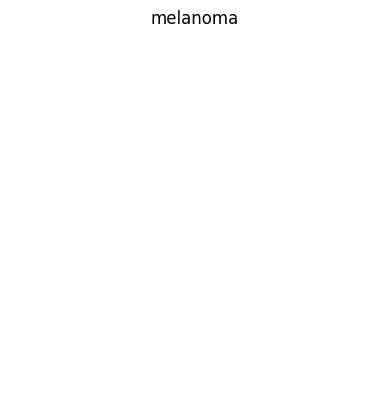

In [5]:
plt.imshow(valid_images[5])
plt.title(valid_labels[5])
plt.axis('off')
plt.show()

In [6]:
def encoder(labels):

    # Define a manual mapping for specific labels
    mapping = {
        'melanoma': 0,
        'nevus': 1,
        'seborrheic_keratosis': 1
    }

    # Transform labels to numerical values using the manual mapping
    encoded_labels = np.array([mapping[label] for label in labels])
    
    return encoded_labels

In [7]:
# encode the labels
train_labels_encoded = encoder(train_labels)
test_labels_encoded = encoder(test_labels)
valid_labels_encoded = encoder(valid_labels)

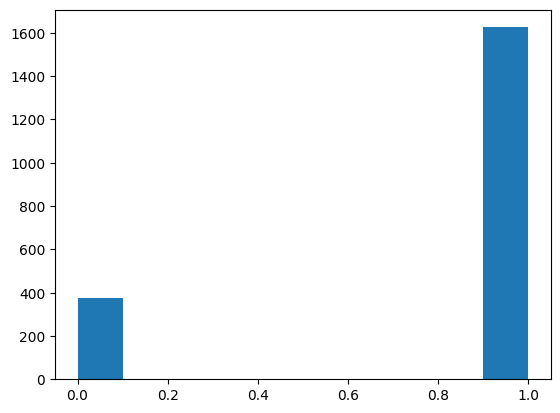

In [8]:
plt.hist(train_labels_encoded)
plt.show()

In [9]:
import tensorflow as tf
from keras.applications import EfficientNetV2S
from keras.optimizers import Adam
from keras.models import Sequential

In [10]:
efficient_net = EfficientNetV2S(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficient_net.trainable = False

In [11]:
mobile_net = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobile_net.trainable = False

In [12]:
efficient_netB3 = tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficient_netB3.trainable = False

In [13]:


model = Sequential([
    efficient_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Function  (None, 7, 7, 1280)        20331360  
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 20499721 (78.20 MB)
Trainable params: 1683

In [25]:
model1 = Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])

In [26]:
model2 = Sequential([
    efficient_netB3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 120, activation='relu'),
    tf.keras.layers.Dense(units = 120, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation='sigmoid'),
])

In [17]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 dense_6 (Dense)             (None, 7, 7, 120)         184440    
                                                                 
 dense_7 (Dense)             (None, 7, 7, 120)         14520     
                                                                 
 dense_8 (Dense)             (None, 7, 7, 1)           121       
                                                                 
Total params: 10982616 (41.90 MB)
Trainable params: 199081 (777.66 KB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [18]:
# train model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels_encoded))

Epoch 1/10
63/63 [==============================] - 119s 2s/step - loss: 0.4938 - accuracy: 0.8055 - val_loss: 0.4512 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 106s 2s/step - loss: 0.4441 - accuracy: 0.8130 - val_loss: 0.4264 - val_accuracy: 0.8000
Epoch 3/10
63/63 [==============================] - 105s 2s/step - loss: 0.4247 - accuracy: 0.8195 - val_loss: 0.4184 - val_accuracy: 0.8133
Epoch 4/10
63/63 [==============================] - 107s 2s/step - loss: 0.4051 - accuracy: 0.8220 - val_loss: 0.4064 - val_accuracy: 0.8333
Epoch 5/10
63/63 [==============================] - 105s 2s/step - loss: 0.3859 - accuracy: 0.8320 - val_loss: 0.4218 - val_accuracy: 0.8133
Epoch 6/10
63/63 [==============================] - 105s 2s/step - loss: 0.3784 - accuracy: 0.8365 - val_loss: 0.4038 - val_accuracy: 0.8400
Epoch 7/10
63/63 [==============================] - 106s 2s/step - loss: 0.3741 - accuracy: 0.8485 - val_loss: 0.4170 - val_accuracy: 0.8200
Epoch 8/10
63

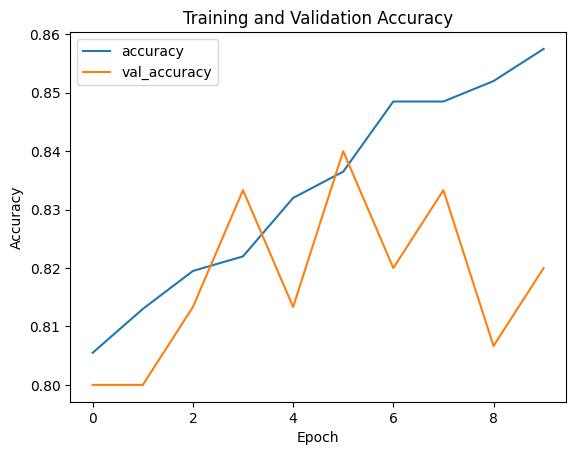

In [20]:
# plot the training and validation accuracy and loss at each epoch

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [27]:
np.random.seed(42)

In [28]:
# train model1
model1.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels_encoded))

Epoch 1/10
63/63 [==============================] - 35s 519ms/step - loss: 0.4864 - accuracy: 0.8115 - val_loss: 0.4622 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 32s 509ms/step - loss: 0.4232 - accuracy: 0.8195 - val_loss: 0.4376 - val_accuracy: 0.8133
Epoch 3/10
63/63 [==============================] - 31s 496ms/step - loss: 0.3948 - accuracy: 0.8300 - val_loss: 0.4212 - val_accuracy: 0.8133
Epoch 4/10
63/63 [==============================] - 30s 484ms/step - loss: 0.3734 - accuracy: 0.8430 - val_loss: 0.4187 - val_accuracy: 0.8200
Epoch 5/10
63/63 [==============================] - 30s 484ms/step - loss: 0.3558 - accuracy: 0.8505 - val_loss: 0.3988 - val_accuracy: 0.8400
Epoch 6/10
63/63 [==============================] - 30s 484ms/step - loss: 0.3397 - accuracy: 0.8570 - val_loss: 0.4118 - val_accuracy: 0.8200
Epoch 7/10
63/63 [==============================] - 30s 483ms/step - loss: 0.3251 - accuracy: 0.8635 - val_loss: 0.4147 - val_accuracy: 0.8200

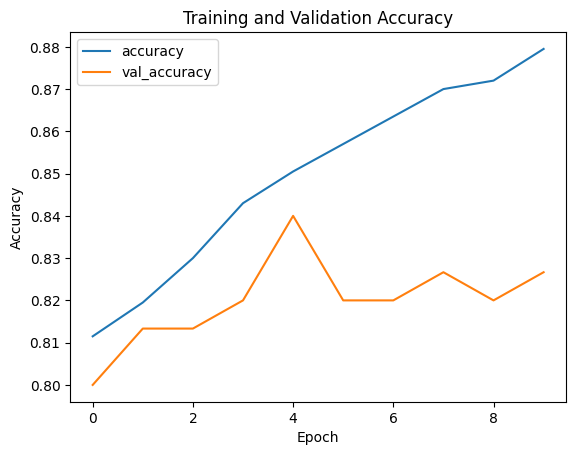

In [29]:
# plot the training and validation accuracy and loss at each epoch

plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [30]:
# train model2
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels_encoded, epochs=10, batch_size=32, validation_data=(valid_images, valid_labels_encoded))

Epoch 1/10
63/63 [==============================] - 119s 2s/step - loss: 0.5090 - accuracy: 0.8000 - val_loss: 0.4775 - val_accuracy: 0.8000
Epoch 2/10
63/63 [==============================] - 109s 2s/step - loss: 0.4468 - accuracy: 0.8130 - val_loss: 0.4556 - val_accuracy: 0.8000
Epoch 3/10
63/63 [==============================] - 109s 2s/step - loss: 0.4218 - accuracy: 0.8155 - val_loss: 0.4410 - val_accuracy: 0.8067
Epoch 4/10
63/63 [==============================] - 107s 2s/step - loss: 0.4021 - accuracy: 0.8250 - val_loss: 0.4362 - val_accuracy: 0.8133
Epoch 5/10
63/63 [==============================] - 107s 2s/step - loss: 0.3886 - accuracy: 0.8310 - val_loss: 0.4289 - val_accuracy: 0.8200
Epoch 6/10
63/63 [==============================] - 107s 2s/step - loss: 0.3775 - accuracy: 0.8385 - val_loss: 0.4247 - val_accuracy: 0.8133
Epoch 7/10
63/63 [==============================] - 107s 2s/step - loss: 0.3688 - accuracy: 0.8470 - val_loss: 0.4234 - val_accuracy: 0.8200
Epoch 8/10
63

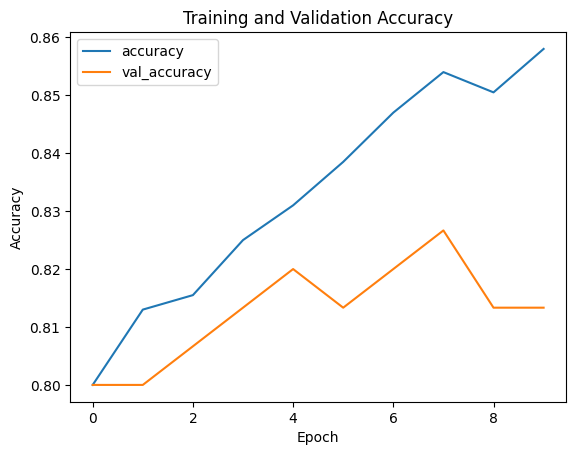

In [31]:
# plot the training and validation accuracy and loss at each epoch

plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()